In [2]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

ori_csv_data = pd.read_csv(os.path.join('sets', '165818_CKD-origin.csv'), encoding='ISO-8859-1')
print("Data shape (rows, columns) =  ", ori_csv_data.shape)

#print(ori_csv_data.info())
print("Columns: " + str(list(ori_csv_data.columns)))

Data shape (rows, columns) =   (918, 68)
Columns: ['id', 'name', 'gender', 'age', 'height', 'weight', 'diagnosis', 'history', 'etiology', 'remarks', '24hPro', 'SCr', 'BUN', 'Albamin', 'GFR', 'CKD stage', 'dCKD', 'USET', 'rLen', 'rShort', 'rThick', 'rPT', 'rPTLTA', 'rPTLPA', 'rPTLA', 'rPTSA', 'rPTSPA', 'rPSPA', 'Unnamed: 28', 'LE', 'rKME', 'rKUPE', 'rRPE ', 'Unnamed: 33', 'lLen', 'lShort', 'lThick', 'lPT', 'lPTA', 'lPGA', 'lPLA', 'lTSPA', 'lSPA', 'lPSA', 'Unnamed: 44', 'SE', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK', 'rAR', 'lAR', 'rRP', 'lRP', 'PDT', 'PP', 'PK', 'PL', 'GloNumGM', 'GloNumIM', 'SW', 'SWR', 'Unnamed: 63', 'DSR', 'DLR', 'rRR', 'lRR']


In [3]:
###################################
# data process
###################################
#step 1: remove non label(dCKD) rows
dat_proc_1 = ori_csv_data[ori_csv_data['dCKD'].notna()]
#print("Data shape (rows, columns) =  ", res_dat_proc_1.shape)

data_labels = dat_proc_1.dCKD.values
print("TRUE rate: ", data_labels.sum()/len(data_labels))
print("TRUE count: ", list(dat_proc_1.dCKD).count(1))
print("FALSE count: ", list(dat_proc_1.dCKD).count(0))

#step 2: choose relevant columns
#dat_proc_2 = dat_proc_1[[ 'age', 'height', 'weight', 'rLen', 'rShort', 'rPT', 'rPTLPA', 'LE', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK', 'DSR', 'DLR']]
dat_proc_2 = dat_proc_1[[ 'age', 'height', 'weight', 'rLen', 'rPT', 'rPTLPA', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK']]
#dat_proc_2 = dat_proc_1[[ 'age', 'height', 'weight', 'rLen', 'rShort', 'rPT', 'rPTLPA', 'LE', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK']]
#dat_proc_2 = dat_proc_1[[ 'age', 'height', 'weight', 'rLen', 'rShort', 'rPT', 'rPTLPA', 'LE', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSR', 'DLR']]
#print("Data shape (rows, columns) =  ", dat_proc_2.shape)
#print(res_dat_proc_2.count())

#step3-6: replace illigal data to median 
dat_proc_3 = dat_proc_2.replace('#DIV/0!', 0)
dat_proc_4 = dat_proc_3.fillna(0)
dat_proc_5 = dat_proc_4.astype('float32')
dat_proc_6 = dat_proc_5.replace(0, dat_proc_5.median())
#print(dat_proc_6.head(10))

#step 7: normalization
# max-min normalization
data = (dat_proc_6 - dat_proc_6.min())/(dat_proc_6.max() - dat_proc_6.min())
#print(data.head(10))

# z-score normalization
data1 = (dat_proc_6 - dat_proc_6.mean())/(dat_proc_6.std())  
#print(data1.head(10))

# Split dataset to training and testing dataset
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.1, random_state=100)
print("training data shape (rows, columns) =  ", train_data.shape)
print("TRUE rate: ", train_labels.sum()/len(train_labels))

print("testing data shape (rows, columns) =  ", test_data.shape)
print("TRUE rate: ", test_labels.sum()/len(test_labels))


TRUE rate:  0.4623059866962306
TRUE count:  417
FALSE count:  485
training data shape (rows, columns) =   (811, 18)
TRUE rate:  0.468557336621455
testing data shape (rows, columns) =   (91, 18)
TRUE rate:  0.4065934065934066


[0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

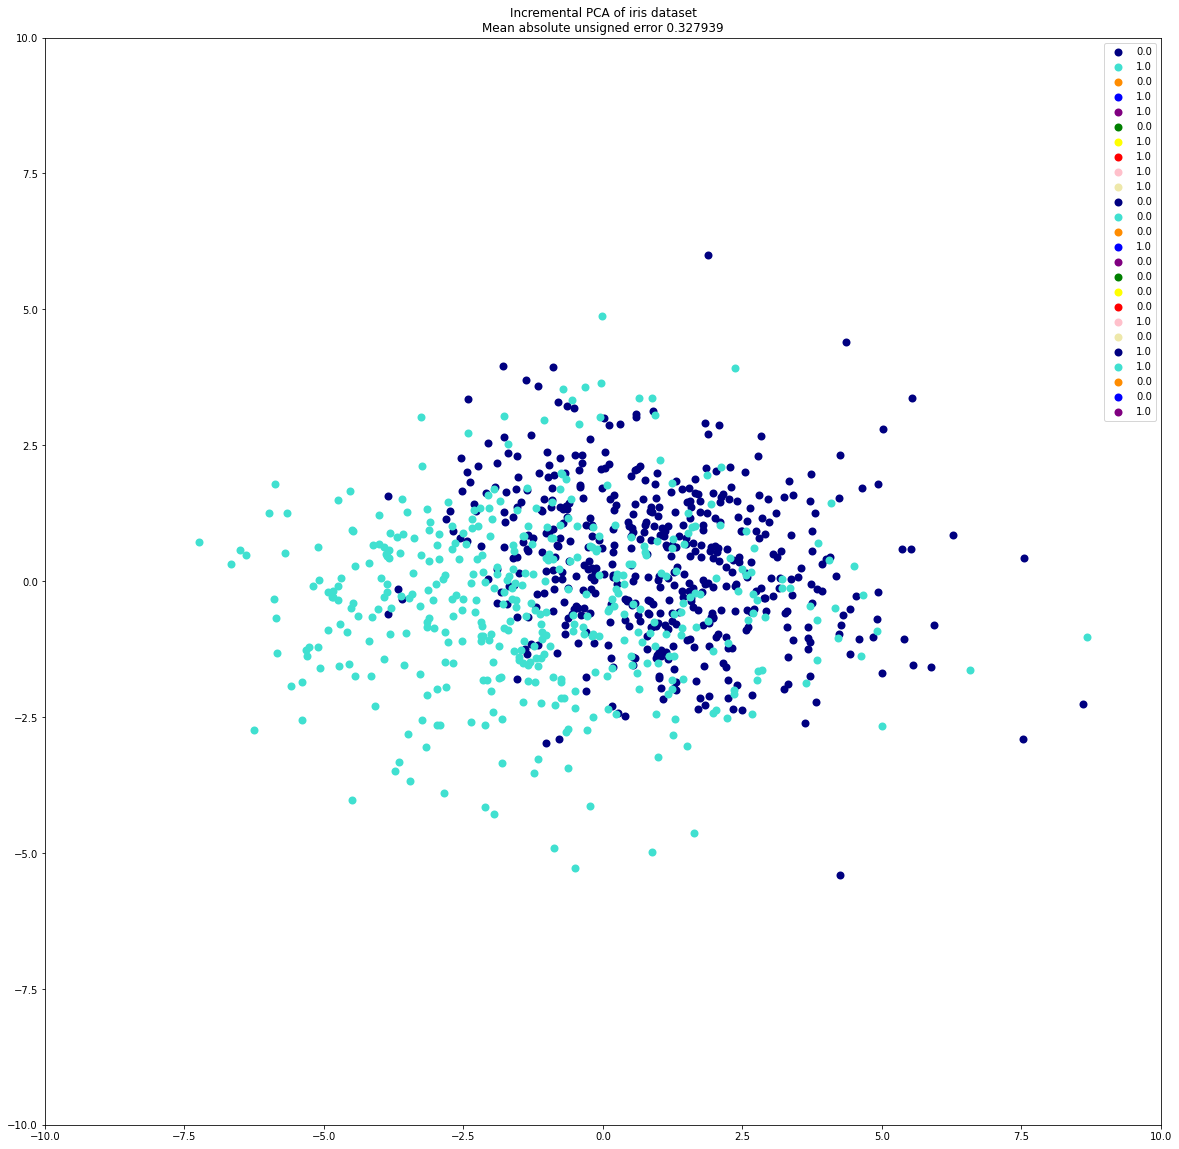

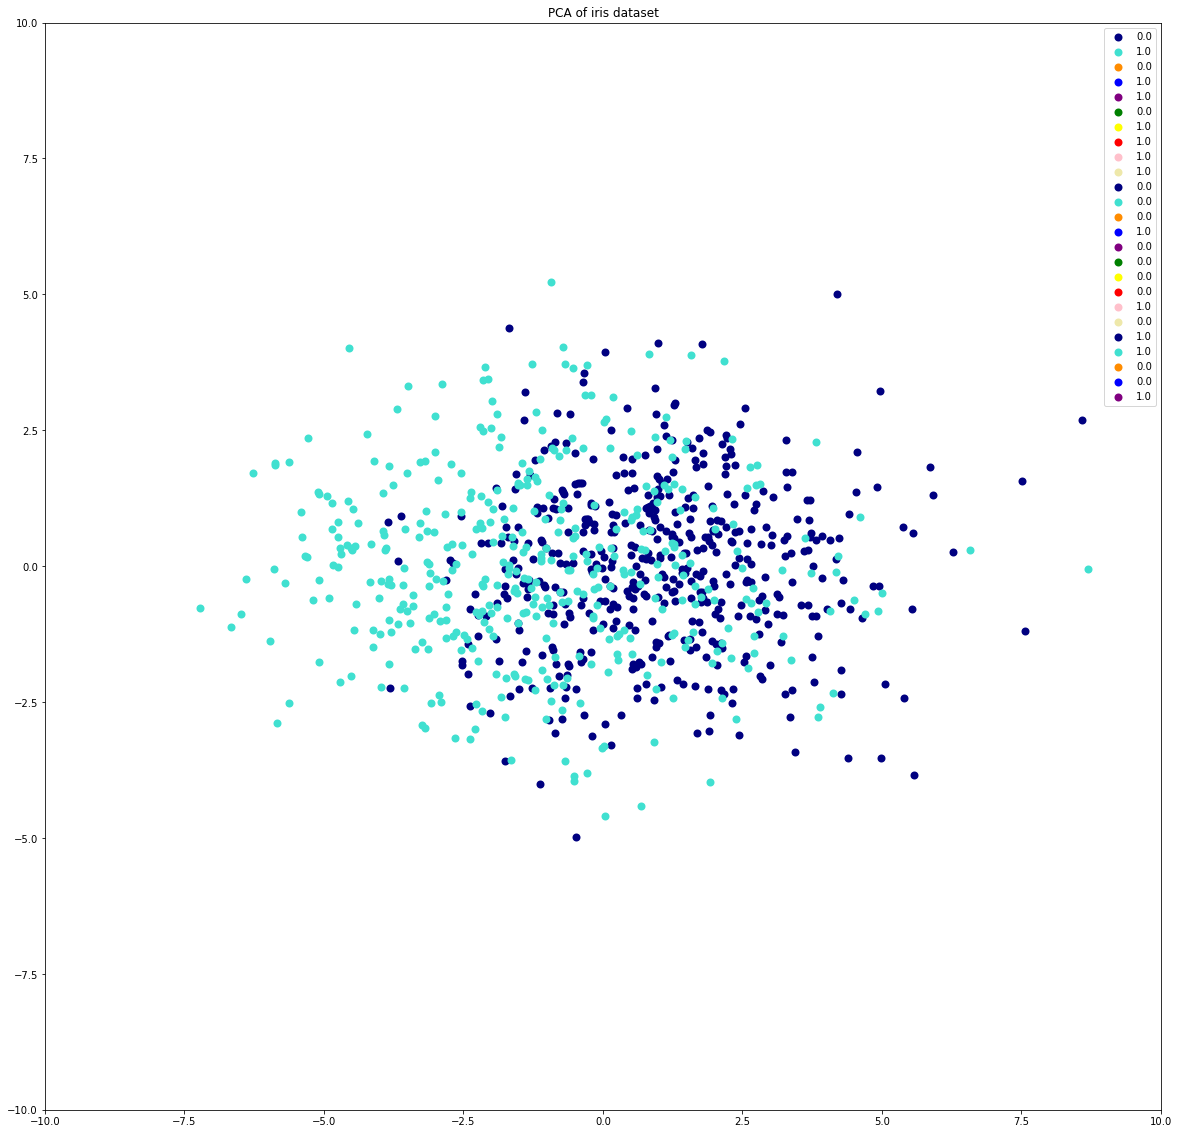

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

#train_data = pd.read_csv("train.csv")
#LABELS = train_data['species']

train_data = dat_proc_6
LABELS = data_labels
y = data_labels
# 将train_data中的‘id’列弹出。
#ID = train_data.pop('id')
# print train_data[0:1]
 
# 将train_data中的‘species’列弹出。
#y = train_data.pop('species')

# 将species向量化。
y = LabelEncoder().fit(y).transform(y)
print(y)
 
# standardize the data by setting the mean to 0 and std to 1
standardize = True
X = StandardScaler().fit(train_data).transform(train_data) if standardize else train_data.values
print(X[0:1])
 
from sklearn.decomposition import PCA, IncrementalPCA
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)
 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
 
colors = ['navy', 'turquoise', 'darkorange', 'blue', 'purple', 'green',
          'yellow','red','pink', 'palegoldenrod','navy', 'turquoise', 'darkorange', 'blue', 'purple', 'green',
          'yellow','red','pink', 'palegoldenrod','navy', 'turquoise', 'darkorange', 'blue', 'purple', 'green',
          'yellow','red','pink', 'palegoldenrod',]
 
for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(20, 20))
    for color, i, target_name in \
    zip(colors, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], LABELS):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)
 
    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-10, 10, -10, 10])

plt.show()

ValueError: 'c' argument has 811 elements, which is inconsistent with 'x' and 'y' with size 902.

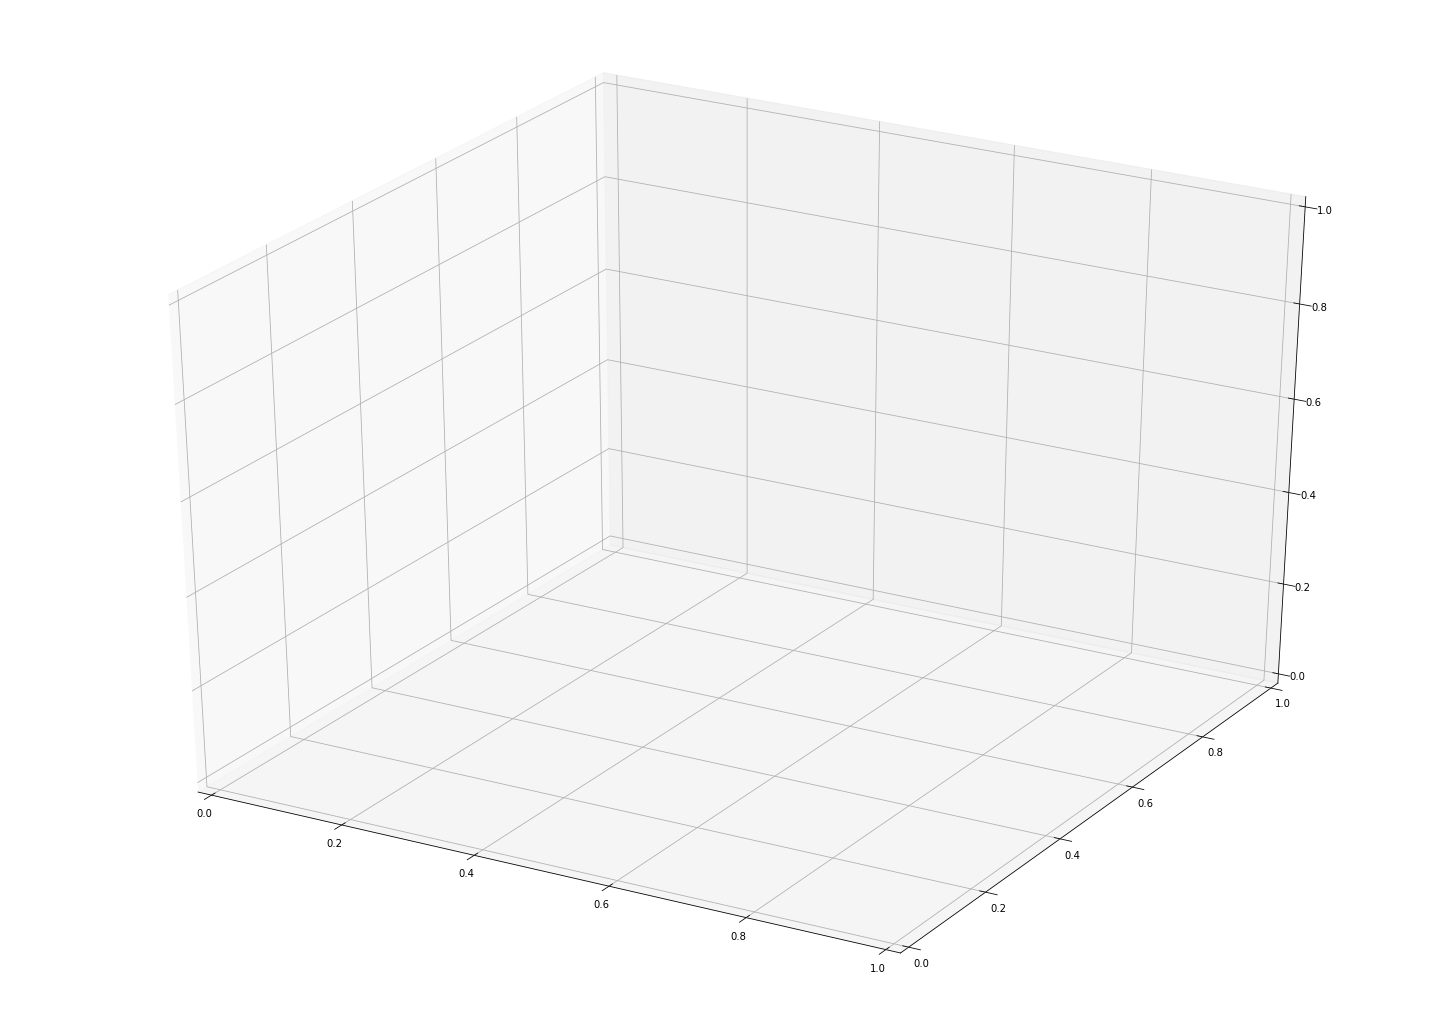

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
y = train_labels
X = train_data
fig = plt.figure(1, figsize=(20, 14))
ax = Axes3D(fig)
X_reduced = PCA(n_components=3).fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

#for color, i, target_name in zip(colors, ['red', 'green', 'blue'], target_names):
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("PCA")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(train_data, train_labels)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test_labels, clf.predict(test_data)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.266 (+/-0.001) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.266 (+/-0.001) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.266 (+/-0.001) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.266 (+/-0.001) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.266 (+/-0.001) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.266 (+/-0.001) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.266 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.266 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.807 (+/-0.052) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.266 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.808 (+/-0.032) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.807 (+/-0.052) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'

In [22]:
# Split training dataset to 2 group
tr_data, ts_data, tr_labels, ts_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=100)
print("self training data shape (rows, columns) =  ", tr_data.shape)
print("self test data shape (rows, columns) =  ", ts_data.shape)

from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=2000)
clf.fit(tr_data, tr_labels)

print("Weight vector: " + str(clf.coef_))
print("Bias: " + str(clf.intercept_))
print("Prediction accuracy:", clf.score(ts_data, ts_labels))

print("Prediction test accuracy:", clf.score(test_data, test_labels))

self training data shape (rows, columns) =   (729, 18)
self test data shape (rows, columns) =   (82, 18)
Weight vector: [[ 0.73161094  0.20677928  1.04257185 -0.67758396 -0.34522275  0.42276478
   1.64777263  0.7686553  -1.28006601 -0.83266532 -0.06629195 -0.7950711
   0.14357742  1.14998625  0.26585746 -0.99927315 -0.127281   -1.21032012]]
Bias: [0.11317971]
Prediction accuracy: 0.8048780487804879
Prediction test accuracy: 0.8131868131868132


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]}]

print("# Tuning hyper-parameters for accuracy")
clf = GridSearchCV(LinearSVC(), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(train_data, train_labels)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

#train and test by using best parameters.
clf = LinearSVC(random_state=10, C=clf.best_params_['C'])
clf.fit(tr_data, tr_labels)

print("Weights: " + str(clf.coef_))
print("Bias: " + str(clf.intercept_))
print("Prediction accuracy:", clf.score(ts_data, ts_labels))

print("Prediction test accuracy:", clf.score(test_data, test_labels))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set:
{'C': 0.1}
Grid scores on development set:
0.535 (+/-0.019) for {'C': 0.0001}
0.746 (+/-0.080) for {'C': 0.001}
0.789 (+/-0.106) for {'C': 0.01}
0.814 (+/-0.093) for {'C': 0.1}
0.811 (+/-0.066) for {'C': 1}
0.809 (+/-0.058) for {'C': 10}
0.783 (+/-0.118) for {'C': 100}
0.681 (+/-0.225) for {'C': 1000}
0.715 (+/-0.174) for {'C': 10000}
Weights: [[ 0.65318168  0.17456108  0.59083409 -0.59343556 -0.37530949  0.34267993
   1.10330441  0.65320934 -0.7466332  -0.34221235 -0.03874073 -0.26562114
  -0.3353029   0.87550705  0.37211992 -0.74005922 -0.27813294 -0.9674955 ]]
Bias: [0.02797149]
Prediction accuracy: 0.8048780487804879
Prediction test accuracy: 0.8021978021978022


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#tr_data, ts_data, tr_labels, ts_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=10)
clf = DecisionTreeClassifier(criterion='entropy')

scores = cross_val_score(clf, train_data, train_labels,  cv=5, scoring='f1')
print('Scores max', scores.max())
print('Scores min', scores.min())
print('Scores mean', scores.mean())

clf.fit(tr_data, tr_labels)

print("Accuracy", clf.score(ts_data, ts_labels))
print("The depth of this tree is", clf.tree_.max_depth)

#graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
#graph.render('graphs/tweet_dt_gini')

clf.fit(train_data, train_labels)
#print("Prediction eval accuracy:", clf.score(eval_data, eval_labels))
print("Prediction test accuracy:", clf.score(test_data, test_labels))


Scores max 0.689655172413793
Scores min 0.6351351351351351
Scores mean 0.6744791223556827
Accuracy 0.7317073170731707
The depth of this tree is 13
Prediction test accuracy: 0.7142857142857143


In [25]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(tr_data, tr_labels)
#DecisionTreeClassifier()

print("Accuracy", clf.score(ts_data, ts_labels))
print("The depth of this tree is", clf.tree_.max_depth)

#graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
#graph.render('graphs/dt_entropy')

clf.fit(train_data, train_labels)
#DecisionTreeClassifier()
#print("Prediction eval accuracy:", clf.score(eval_data, eval_labels))
print("Prediction test accuracy:", clf.score(test_data, test_labels))

Accuracy 0.6829268292682927
The depth of this tree is 15
Prediction test accuracy: 0.7472527472527473


In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=None, random_state=0, n_estimators=100, criterion='gini') 

scores = cross_val_score(clf, train_data, train_labels,  cv=5, scoring='f1')
print('Scores max', scores.max())
print('Scores min', scores.min())
print('Scores mean', scores.mean())

clf.fit(train_data, train_labels) 
print(str(list(train_data.columns)))
print(clf.feature_importances_)

#print("Prediction eval accuracy:", clf.score(eval_data, eval_labels)) 
print("Prediction test accuracy:", clf.score(test_data, test_labels))

Scores max 0.7832167832167832
Scores min 0.7534246575342466
Scores mean 0.7647066412271887
['age', 'height', 'weight', 'rLen', 'rPT', 'rPTLPA', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK']
[0.05568083 0.03038661 0.03309807 0.08018979 0.06002991 0.0367516
 0.11380519 0.06425898 0.04104068 0.05038454 0.02553634 0.03484925
 0.07842217 0.07165287 0.03718217 0.04119018 0.05170986 0.09383096]
Prediction test accuracy: 0.8021978021978022


In [27]:
from sklearn.linear_model import LogisticRegression

tr_data, ts_data, tr_labels, ts_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=1)
clf = LogisticRegression(penalty= 'l2')

#train and test on setting A
clf.fit(tr_data, tr_labels)
print('Prediction Accuracy:', clf.score(ts_data, ts_labels))

print(str(list(tr_data.columns)))
print(clf.coef_)
print("bias: " + str(clf.intercept_))

#train and test on setting B
#clf.fit(tr_data, tr_labels)

print('Prediction Accuracy:', clf.score(test_data, test_labels))

Prediction Accuracy: 0.803680981595092
['age', 'height', 'weight', 'rLen', 'rPT', 'rPTLPA', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK']
[[ 1.81137829  0.38324114  1.58570857 -1.23432983 -0.97379075  0.97766314
   2.8018101   1.84463013 -2.06948865 -1.16130173 -0.53114971 -0.58907349
  -0.6910847   2.42581526  1.13427041 -1.73620257 -0.9060667  -2.22758784]]
bias: [-0.29342354]
Prediction Accuracy: 0.7582417582417582


In [28]:

tr_data, ts_data, tr_labels, ts_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=1)

tuned_parameters = [{'C': [1e-2, 0.1, 0.25, 0.5, 0.75, 1, 10, 100, 1000]}]

clf = GridSearchCV(LogisticRegression(penalty= 'l2'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(train_data, train_labels)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

#train and test by using best parameters.
clf = LogisticRegression(penalty= 'l2', C=clf.best_params_['C'])

clf.fit(tr_data, tr_labels)

print("Weights: " + str(clf.coef_))
print("Bias: " + str(clf.intercept_))
print("Prediction accuracy:", clf.score(ts_data, ts_labels))

print("Prediction test accuracy:", clf.score(test_data, test_labels))

Best parameters set found on development set:
{'C': 1}
Grid scores on development set:
0.746 (+/-0.055) for {'C': 0.01}
0.784 (+/-0.051) for {'C': 0.1}
0.809 (+/-0.038) for {'C': 0.25}
0.810 (+/-0.022) for {'C': 0.5}
0.816 (+/-0.019) for {'C': 0.75}
0.817 (+/-0.022) for {'C': 1}
0.809 (+/-0.019) for {'C': 10}
0.810 (+/-0.035) for {'C': 100}
0.808 (+/-0.034) for {'C': 1000}
Weights: [[ 1.83500361  0.36742964  1.42858449 -1.61186744 -0.84609009  0.97408863
   2.89669135  1.70685855 -2.03755869 -0.94621936 -0.36871841 -0.6187289
  -0.64038473  2.27512531  1.04701009 -1.66938008 -0.96715169 -2.5283471 ]]
Bias: [0.06423425]
Prediction accuracy: 0.8170731707317073
Prediction test accuracy: 0.7472527472527473
